# V2X-Sim Dataset Tutorial

WIP

## Dataset schema

This part is adapted from [nuScenes tutorial](https://colab.research.google.com/github/nutonomy/nuscenes-devkit/blob/master/python-sdk/tutorials/nuscenes_tutorial.ipynb) since our V2X-Sim dataset follows the same structure as nuScenes. \
In this part of the tutorial, let us go through a top-down introduction of our database. Our dataset comprises of elemental building blocks that are the following:

1. `log` - Log information from which the data was extracted.
2. `scene` - 20 second snippet of a car's journey.
3. `sample` - An annotated snapshot of a scene at a particular timestamp.
4. `sample_data` - Data collected from a particular sensor.
5. `ego_pose` - Ego vehicle poses at a particular timestamp.
6. `sensor` - A specific sensor type.
7. `calibrated sensor` - Definition of a particular sensor as calibrated on a particular vehicle.
8. `instance` - Enumeration of all object instance we observed.
9. `category` - Taxonomy of object categories (e.g. vehicle, human). 
10. `attribute` - Property of an instance that can change while the category remains the same.
11. `visibility` - Fraction of pixels visible in all the images collected from 6 different cameras.
12. `sample_annotation` - An annotated instance of an object within our interest.
13. `map` - Map data that is stored as binary semantic masks from a top-down view.

The database schema is visualized below. For more information see the [nuScenes schema](https://github.com/nutonomy/nuscenes-devkit/blob/master/docs/schema_nuscenes.md) page.
![](https://www.nuscenes.org/public/images/nuscenes-schema.svg)

In [1]:
!pip install v2x-sim-visualizer
!pip install gdown

## Download V2X-Sim-2.0-mini dataset

In [4]:
import gdown

In [5]:
# download V2X-Sim-2.0-mini dataset
url = 'https://drive.google.com/u/0/uc?id=1kipZKmsrELOLV1DxgB8vBU1K009tnA8V'
output = 'V2X-Sim-2.0-mini.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1NmA9pDok6q9fJkvnCdrDO0mx7n55-9WK
To: /scratch/dm4524/ai4ce/V2X-Sim-tutorials/V2X-Sim-2.0-mini.zip
100%|██████████| 431M/431M [00:02<00:00, 199MB/s]  


'V2X-Sim-2.0-mini.zip'

Unzip V2X-Sim-2.0-mini dataset in silence mode

In [1]:
%%capture
!unzip V2X-Sim-2.0-mini.zip

## Initialization

In [1]:
from nuscenes.nuscenes import NuScenes as V2XSimDataset

In [2]:
v2x_sim = V2XSimDataset(version='v2.0-mini', dataroot='./V2X-Sim-2.0-mini', verbose=True)

Loading NuScenes tables for version v2.0-mini...
Loading nuScenes-lidarseg...
32 category,
5 attribute,
4 visibility,
157 instance,
130 sensor,
130 calibrated_sensor,
13000 ego_pose,
12 log,
1 scene,
100 sample,
13000 sample_data,
15292 sample_annotation,
3 map,
600 lidarseg,
Done loading in 0.627 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


## 1. Scene
This V2X-Sim-2.0-mini dataset contains only one scene (scene 5).


In [3]:
# To investigate a single scene
my_scene = v2x_sim.scene[0]
my_scene

{'token': 'ofw501ws5eyia0341m1f83ofwf51w9q8',
 'log_token': '2zhl7qeiey1jg30067tj03eyphdy3a14',
 'nbr_samples': 100,
 'first_sample_token': 'q68g8v6474j10l675mphs2r8w97575ca',
 'last_sample_token': '0740v806u16chqb4nmli6pe6h423r1ek',
 'name': 'scene_5',
 'description': 'an intersection of map town3'}

## 2. Sample
There are as many as 47,200 samples in the V2X-Sim 2.0 full dataset. The details for each sample can be viewed as follows.

In [4]:
my_scene = v2x_sim.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = v2x_sim.get('sample', first_sample_token)

my_sample

{'token': 'q68g8v6474j10l675mphs2r8w97575ca',
 'timestamp': 6,
 'prev': '',
 'next': '3c4bft9odwatyv0dz1v86w4085a7rfm0',
 'scene_token': 'ofw501ws5eyia0341m1f83ofwf51w9q8',
 'data': {'CAM_id_0_0': '89d3cb7qve777ro7ag55547sve55w49n',
  'DEP_id_0_0': '16njc6ewe35qt5nm3eqi4n18lo8y5236',
  'SEG_id_0_0': 'w4uoi2x12o13q5268h2y9s307lut8csz',
  'CAM_id_0_1': 'l7f89ei0015o842pjb8w0t9991tzdlr0',
  'DEP_id_0_1': 'd5082i1yb9k825xdu76u9y60s56q69g3',
  'SEG_id_0_1': '488n5ooh9ki9da59wjhu0b2keaml3j9o',
  'CAM_id_0_2': 'xy62tz34a2zv45c8o74dfsc48t0102u0',
  'DEP_id_0_2': '33p4360gj61075418p73k8wr1r7ble5g',
  'SEG_id_0_2': 'o3a2fi1oz56bjvwb1n3x26rkxoy5xiwd',
  'CAM_id_0_3': 'b6to8yssedkif1265i8h2xgwfr0k5j19',
  'DEP_id_0_3': '74i360jkccmu6992250la686ck50p1ej',
  'SEG_id_0_3': '53w3xrq278339g29cn4a6g779p7u617n',
  'LIDAR_TOP_id_0': 'dn3315qva8ka52f5j234j451t840ll96',
  'BEV_TOP_id_0': '7rlu7t44422ild3q9glt89e41zfk5ytu',
  'SEMLIDAR_TOP_id_0': '0a369944x909o86mz552b76y1xk2736f',
  'CAM_FRONT_id_1': 'i077v

## 3. Sample data

### RGB camera
Each vehivle has 6 RGB cameras installed: 
- front camera (`CAM_FRONT`)
- front left camera (`CAM_FRONT_LEFT`)
- front right camera (`CAM_FRONT_RIGHT`)
- rear camera (`CAM_BACK`)
- rear left camera (`CAM_BACK_LEFT`)
- rear right camera (`CAM_BACK_RIGHT`) 

Let's visualize data from these cameras for vehicle `1`.

In [5]:
import matplotlib.pyplot as plt

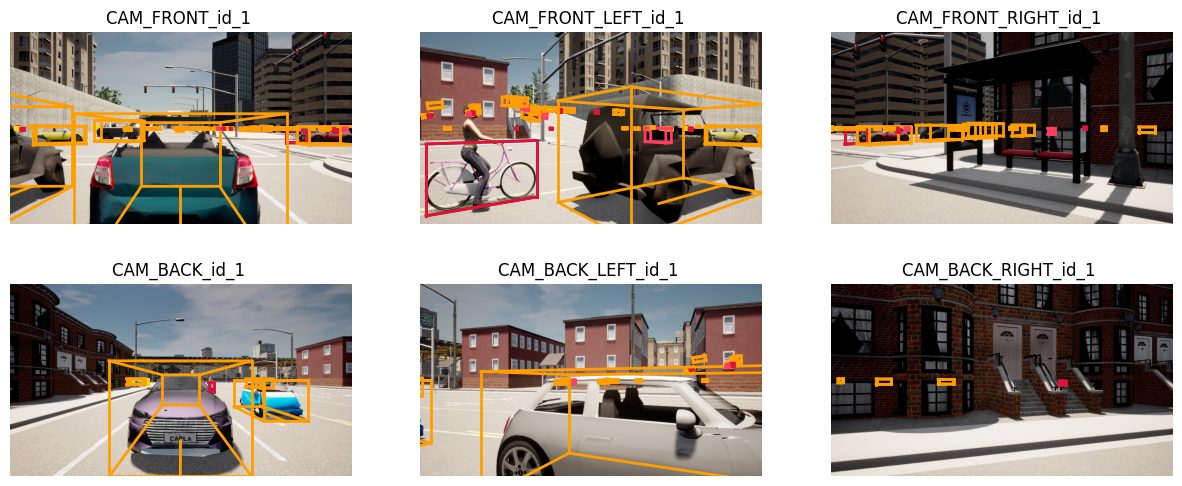

In [6]:
num_rows = 2
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))
channels = ['CAM_FRONT', 'CAM_FRONT_LEFT', 'CAM_FRONT_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_BACK_RIGHT']

vehicle_id = 1

for i in range(num_rows):
    for j in range(num_cols):
        channel = channels[i * num_cols + j]
        sample_data = v2x_sim.get('sample_data', my_sample['data'][f'{channel}_id_{vehicle_id}'])
        v2x_sim.render_sample_data(sample_data['token'], ax=axs[i, j], verbose=False)

We can also plot the point cloud data from the top LIDAR (`LIDAR_TOP`) sensor in these RGB camera images.

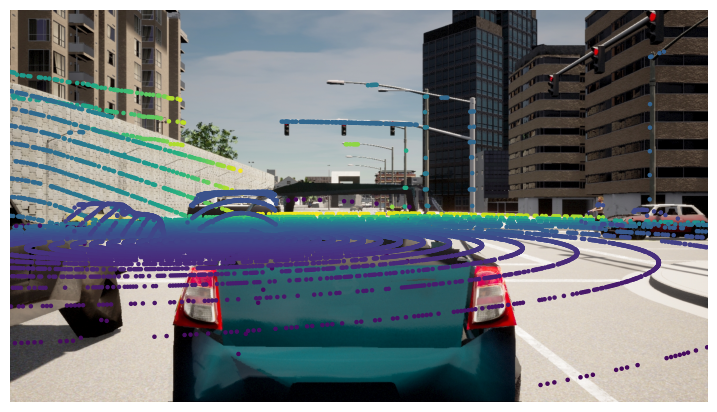

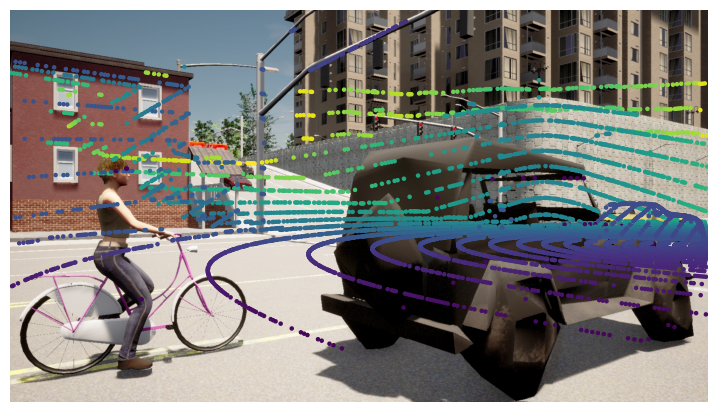

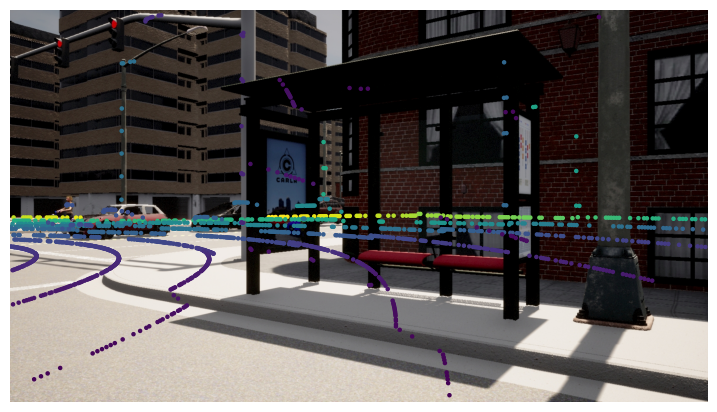

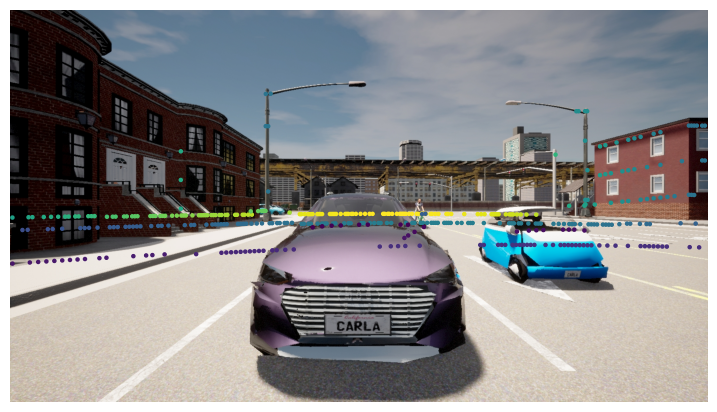

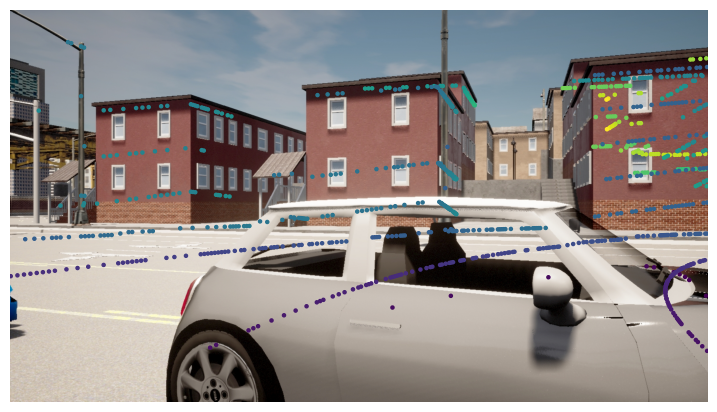

In [7]:
for channel in channels:
    sample = v2x_sim.sample[0]
    v2x_sim.render_pointcloud_in_image(sample['token'], pointsensor_channel='LIDAR_TOP_id_0', camera_channel=f'{channel}_id_{vehicle_id}')

Let's also visualize the front camera (`CAM_FRONT`) for all five vehicles.

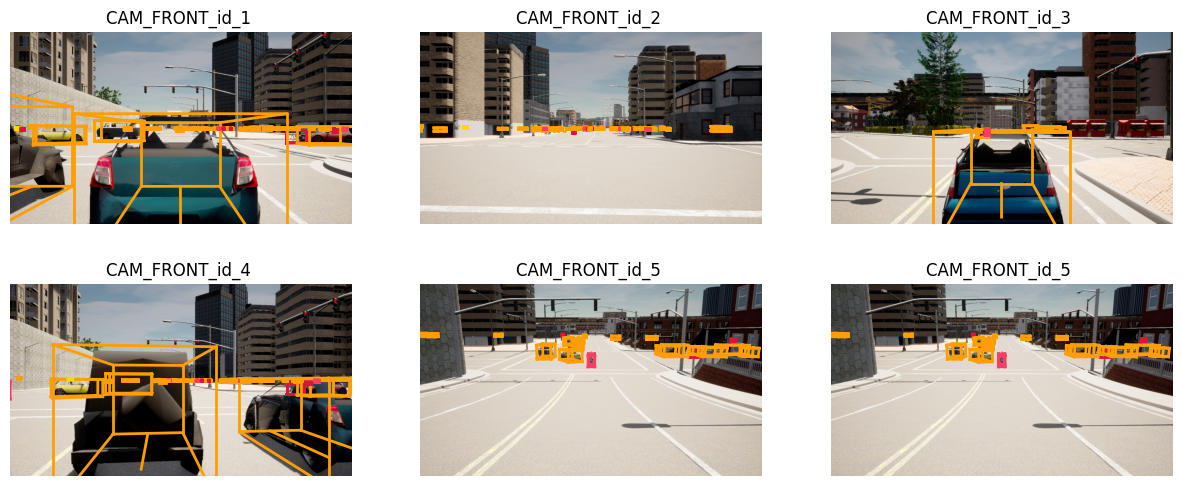

In [8]:
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))

vehicle_id = 1

for i in range(num_rows):
    for j in range(num_cols):
        channel = channels[i * num_cols + j]
        sample_data = v2x_sim.get('sample_data', my_sample['data'][f'CAM_FRONT_id_{vehicle_id}'])
        v2x_sim.render_sample_data(sample_data['token'], ax=axs[i, j], verbose=False)
        
        vehicle_id += 1
        vehicle_id = min(vehicle_id, 5)

### Lidar

In [10]:
from v2x_sim_visualizer import render_sample_data, render_scene_lidar

Lidar data visualization for a single sample. \
Here we are showing the Top BEV (Bird's Eye View) Lidar visualization of the Road-side unit (RSU) in this sample.\

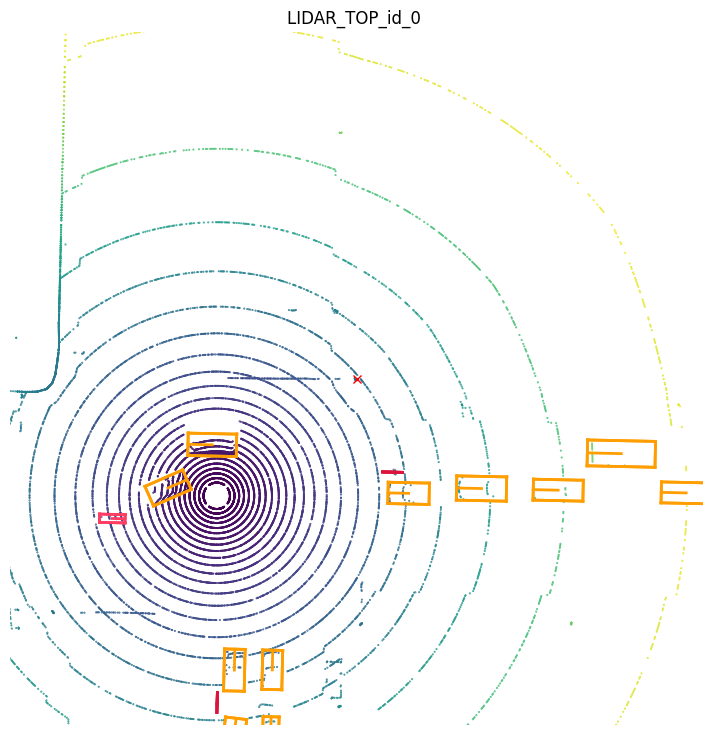

In [11]:
sample_data_token = my_sample['data']['LIDAR_TOP_id_0']
render_sample_data(v2x_sim, sample_data_token,
                        with_anns=True, underlay_map=False, pointsensor_channel='LIDAR_TOP_id_0', axes_limit=32)

Visualize the Top BEV Lidar of all agents (vehicels and RSU) in this scene. \
Data from the RSU is colored grey.

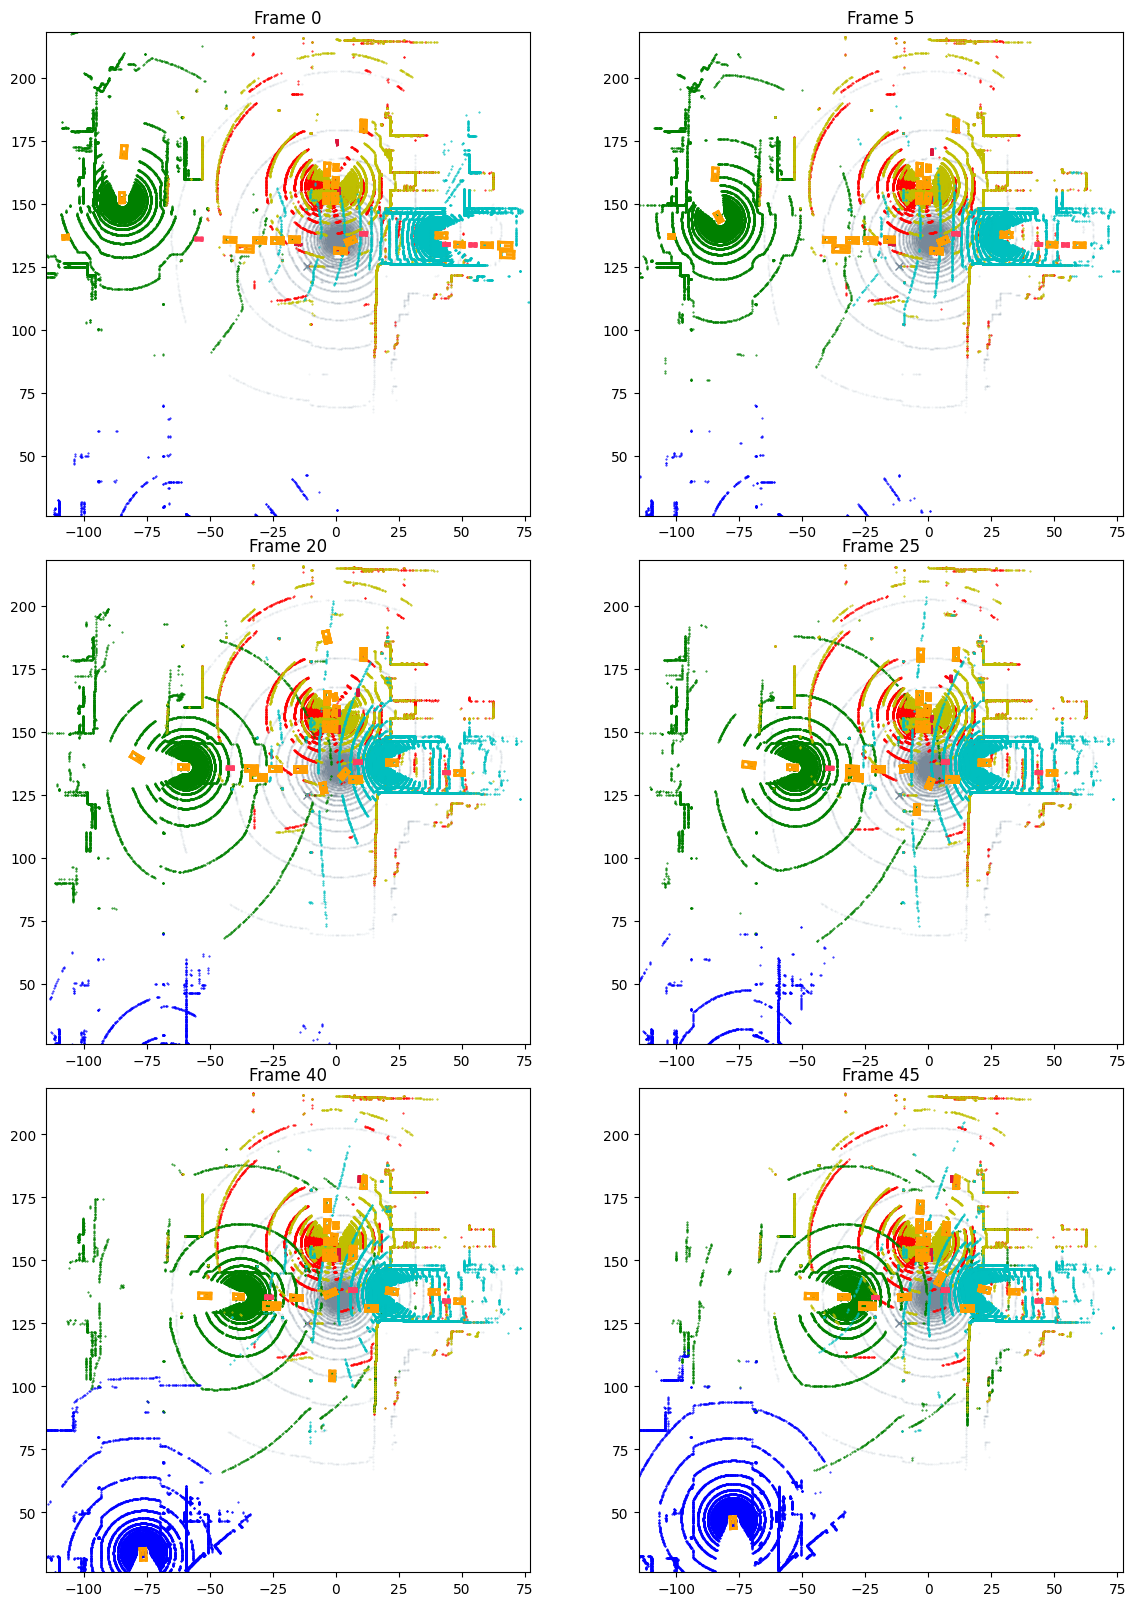

In [18]:
token_scene_no = 'scene_5'
my_scene_token = v2x_sim.field2token('scene', 'name', token_scene_no)[0]

num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))
fig.tight_layout()

for i in range(num_rows):
    for j in range(num_cols):
        frame_idx = i * 20 + j * 5
        render_scene_lidar(v2x_sim, my_scene_token, axes_limit=96, single_frame_idx=frame_idx, ax=axes[i, j])
        axes[i, j].set_title('Frame {}'.format(frame_idx))

plt.show()

### Semantic Lidar

In [ ]:
sample_data_token = my_sample['data']['SEMLIDAR_TOP_id_1']
v2x_sim.render_sample_data(sample_data_token,
                        with_anns=True, underlay_map=False, show_lidarseg=True, pointsensor_channel='SEMLIDAR_TOP_id_1', axes_limit=32)